# Python Assignment
Yvonne Jamar & Gloriana Madrigal

## Question
How do house prices influence consumption in the Netherlands?

## Motivation
Consumption is a major component of GDP, in fact in 2013 it represented approximately 68% of total GDP in the Netherlands (Eurostat). As explained by the life cycle hypothesis ([Modigliani, 1966](https://www.jstor.org/stable/40969831?seq=1#page_scan_tab_contents) ) and the permanent income hypothesis ([Friedman, 1957](http://papers.nber.org/books/frie57-1) ), consumption is determined by a person’s expected income. Individuals tend to adjust their consumption based on the idea that they do not like periods of abundance and deprivation, instead, they prefer a relatively smooth consumption level. 

Housing is probably the most important single asset an individual (or household) will own in his life. For the Dutch population, housing represented between 45% and 73% of a households’ total assets in 1997 [Alessie et al. 2000](https://pure.uvt.nl/ws/files/5http://localhost:8888/files/Documents/Universiteit/Master/Phyton/figure%201.png35786/55.pdf)). The relevance of housing on an individual’s can be seen in Figure 1, which shows the ratio of residential loans to disposable income of Dutch households. The high ratio (well above the European average) is probably related to the high optimism the Dutch have on the state of the economy. Data from the Central Bureau of Statistics shows that 53% of the population had “a little or a lot to spare” in the last quarter of 2016. Just as consumption, the demand for housing depends on the income an individual expects to have in the future ([Attanasio and Browning, 1993](http://www.nber.org/papers/w4453.pdf) ) and other macroeconomic factors such as the interest rates and development of the financial sector ([Benito et al. 2006](http://www.bankofengland.co.uk/publications/Documents/quarterlybulletin/qb060201.pdf)  and [Tsatsaronis and Zhu, 2004](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1968425) ). 

##### Figure 1: Total Outstanding Residential Loans to Disposable Income of Households Ratio (%)
![alt text](http://localhost:8888/files/Documents/Universiteit/Master/Phyton/figure%201.png)

Given the relevance of dwells in a household’s budget, it is important to understand how changes in housing might influence consumption. [Ortalo-Magné and Rady (2006](https://www.jstor.org/stable/3700647?seq=1#page_scan_tab_contents)) mention the role of housing as an asset, and thus as potential collateral. In this case, an increase in housing prices would bring forward some consumption decisions, however, if families do not intend on moving in the long-run, a change in housing prices will not affect consumption decisions. Figure 2 shows the percentage changes in the housing price index for the Netherlands and the European Union. As it can be seen, for most of the period for which we have data, the housing price index decreased, hitting a bottom low of -4% in the third quarter of 2012. 

##### Figure 2: Percentage change in housing price index by quarter
![alt text](http://localhost:8888/files/Documents/Universiteit/Master/Phyton/figure%202.png)

In this paper we will analyze the impact of housing prices on consumption. Based on the model proposed by [Campbell and Cocco (2006](https://dash.harvard.edu/bitstream/handle/1/3122600/campbellssrn_houseprices.pdf?sequence=2) ) we will study the relationship between housing and consumption for different regions of the Netherlands.

## Method
We follow the model proposed by [Campbell and Cocco (2006)]( (https://dash.harvard.edu/bitstream/handle/1/3122600/campbellssrn_houseprices.pdf?sequence=2) and adapt it for the Dutch case. We regress the consumer confidence level on the change in housing prices, household income and add control variables to reduce omitted variable bias. The results from this regression will be used as benchmark when analyzing the parametric model.

Consumer confidence reflects future expectations regarding the real economy, which is linked to the macroeconomic context [Ludvingson, 2004](http://docserver.ingentaconnect.com/deliver/connect/aea/08953309/v18n2/s2.pdf?expires=1485111045&id=89729699&titleid=6117&accname=Guest+User&checksum=DFD00EBF068D71FC9B7D2208EA54F1F5), which is why we include regional GDP, unemployment rate and the percentage of the population that is at risk of poverty. As mentioned above, the inclusion of control variables creates more robust estimates and provides a better specification of the regression model.  Following the parametric model used by [Campbell and Cocco (2006)](https://dash.harvard.edu/bitstream/handle/1/3122600/campbellssrn_houseprices.pdf?sequence=2) we estimate the utility, the fluctuations in the housing prices. We made the following assumptions regarding the effect of the parameters on the dependent variable:

Variable | Effect 
--- | --- | 
Risk aversion | Negative  
Discount Factor |	Positive
Down payment ration | Negative     
 Interest Rate       | Negative     
 Rentel primium      | Ambiguous 

It is important to mention that due to limitations with the data, we were not able to estimate the utility of consumption using regional observations. Unfortunately, data availability allowed us to generate only national estimates. The availability of a regional data set will enrich any future research, as it would provide a better understanding of the different utility levels across the Netherlands.  


## Answer
We have found that houseprices seem to have an influences on consumer confidence. We have found a positive relationship between house prices and consumption in both our regression as in our simulated model.

## Importing libraries and data
We use the following python packages to run the model.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

## Data

For the analysis of the impact of housing prices in consumption we will use a panel set for the period 2006-2014. Most of the relevant data comes from the Central Bureau of Statistics (Netherlands) and it includes quarterly observations both for consumer confidence and for the percentage change in the total number of households. The control variables used were taken from the regional statistics of [Eurostat](http://ec.europa.eu/eurostat/web/regions/data/database?p_p_id=NavTreeportletprod_WAR_NavTreeportletprod_INSTANCE_BQqmHeCfV1BE&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-2&p_p_col_count=1), the main issue with this dataset is that observations are yearly, which is why we had to use the same yearly value for all quarters in the panel we used to run the regressions. 
 
Regarding the calibration model, we used national aggregates, as some relevant variables were not available in a more disaggregate level. As explained in the previous section, the estimation of the utility of consumption was somewhat limited by the lack of regional estimates. For the calibaraion model we did not have quaterly data. We used yearly data from a longer time span to have more observatins. The data was extracted from the Central Bureau of Statistics (Netherlands). 

We will start with giving an overview of our data. As can be seen in the table below, we have 16 observations for every region in the Netherlands. The regions we are using are North, South, West and East. The houseprice index shows the houseprice change compared to the previous period. Conf. shows the consumer confidence in the given period. Income is given x1000, and its yearly data. Unemployment rate is the percentage of the population that is unemployed and is also yearly data. Poverty_risk is the percentage of the population that is at risk of being in poverty. 

In [2]:
dfN = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\Data assignment.NN.csv',\
                  sep=';',header = 0, skipinitialspace=True,)
dfW = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\Data assignment.WN.csv',\
                  sep=';',header = 0, skipinitialspace=True,)
dfE = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\Data assignment.ON.csv',\
                  sep=';',header = 0, skipinitialspace=True,)
dfS = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\Data assignment.ZN.csv',\
                  sep=';',header = 0, skipinitialspace=True,)
df = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\Data assignmentQ.csv',\
                  sep=';',header = 0, skipinitialspace=True,)
df

,Region,Periods,Houseprice index,Conf.,Income,regional GDP,Unemployment Rate,Poverty_risk
0,Noord-Nederland (LD),2011 1e kwartaal,-2.3,-8,31.5,60.937,5.7,11.9
1,Noord-Nederland (LD),2011 2e kwartaal,-3.0,-12,31.5,60.937,5.7,11.9
2,Noord-Nederland (LD),2011 3e kwartaal,-4.4,-27,31.5,60.937,5.7,11.9
3,Noord-Nederland (LD),2011 4e kwartaal,-4.1,-38,31.5,60.937,5.7,11.9
4,Noord-Nederland (LD),2012 1e kwartaal,-4.5,-39,31.6,62.934,6.6,10.1
5,Noord-Nederland (LD),2012 2e kwartaal,-5.3,-38,31.6,62.934,6.6,10.1
6,Noord-Nederland (LD),2012 3e kwartaal,-7.6,-33,31.6,62.934,6.6,10.1
7,Noord-Nederland (LD),2012 4e kwartaal,-7.5,-41,31.6,62.934,6.6,10.1
8,Noord-Nederland (LD),2013 1e kwartaal,-8.1,-44,31.7,64.487,8.0,11.6
9,Noord-Nederland (LD),2013 2e kwartaal,-8.8,-36,31.7,64.487,8.0,11.6


## Descriptive Statistics
Below are shown the descriptive statistics. As can be seen we have a total of 64 observations. 

In [3]:
df.describe()

,Houseprice index,Conf.,Income,regional GDP,Unemployment Rate,Poverty_risk
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-3.842188,-23.578125,33.881250,161.153750,6.443750,10.631250
std,3.370545,13.957765,1.340561,105.030976,1.110966,1.181723
min,-9.000000,-44.000000,31.500000,60.476000,4.700000,8.500000
25%,-6.275000,-36.250000,33.550000,99.878000,5.525000,9.650000
50%,-4.100000,-28.000000,34.250000,123.450000,6.750000,11.050000
75%,-1.650000,-9.000000,34.750000,185.363500,7.325000,11.650000
max,3.200000,0.000000,35.500000,344.956000,8.000000,12.500000


#####  per Region
In the first table below are shown the averages of our variables per region. In the second table ar shown the descriptive statistics per region.

In [4]:
df.columns
grouped_df = df.groupby(by='Region')
grouped_df.mean()

,Houseprice index,Conf.,Income,regional GDP,Unemployment Rate,Poverty_risk
Region,,,,,,
Noord-Nederland (LD),-4.26875,-25.5000,31.675,62.20850,7.075,11.350
Oost-Nederland (LD),-3.93750,-23.1250,34.300,113.20100,6.275,10.450
West-Nederland (LD),-3.16875,-21.4375,35.150,335.88925,6.425,11.450
Zuid-Nederland (LD),-3.99375,-24.2500,34.400,133.31625,6.000,9.275


In [5]:
grouped_df.describe()

Conf.  Houseprice index     Income  \
Region                                                               
Noord-Nederland (LD) count  16.000000         16.000000  16.000000   
                     mean  -25.500000         -4.268750  31.675000   
                     std    14.198591          2.856739   0.152753   
                     min   -44.000000         -8.800000  31.500000   
                     25%   -38.000000         -6.150000  31.575000   
                     50%   -30.000000         -4.300000  31.650000   
                     75%   -11.750000         -2.675000  31.750000   
                     max    -5.000000          0.200000  31.900000   
Oost-Nederland (LD)  count  16.000000         16.000000  16.000000   
                     mean  -23.125000         -3.937500  34.300000   
                     std    13.994642          3.226324   0.193218   
                     min   -40.000000         -8.900000  34.100000   
                     25%   -35.250000         -5.675000  34.175000   
                     50%   -27.500000         -4.100000  34.250000   
                     75%    -9.750000         -1.800000  34.375000   
                     max     0.000000          1.300000  34.600000   
West-Nederland (LD)  count  16.000000         16.000000  16.000000   
                     mean  -21.437500         -3.168750  35.150000   
                     std    14.610356          3.937634   0.236643   
                     min   -38.000000         -8.700000  34.900000   
                     25%   -34.250000         -6.025000  34.975000   
                     50%   -26.000000         -3.350000  35.100000   
                     75%    -6.750000         -0.800000  35.275000   
                     max    -1.000000          3.200000  35.500000   
Zuid-Nederland (LD)  count  16.000000         16.000000  16.000000   
                     mean  -24.250000         -3.993750  34.400000   
                     std    14.064139          3.595454   0.219089   
                     min   -43.000000         -9.000000  34.200000   
                     25%   -37.250000         -6.525000  34.200000   
                     50%   -26.500000         -4.000000  34.350000   
                     75%   -10.250000         -2.250000  34.550000   
                     max    -6.000000          1.800000  34.700000   

                            Poverty_risk  Unemployment Rate  regional GDP  
Region                                                                     
Noord-Nederland (LD) count     16.000000          16.000000     16.000000  
                     mean      11.350000           7.075000     62.208500  
                     std        0.753658           1.010280      1.660215  
                     min       10.100000           5.700000     60.476000  
                     25%       11.225000           6.375000     60.821750  
                     50%       11.700000           7.300000     61.935500  
                     75%       11.825000           8.000000     63.322250  
                     max       11.900000           8.000000     64.487000  
Oost-Nederland (LD)  count     16.000000          16.000000     16.000000  
                     mean      10.450000           6.275000    113.201000  
                     std        1.178700           1.153256      1.430172  
                     min        9.000000           4.800000    111.675000  
                     25%        9.525000           5.400000    112.096500  
                     50%       10.500000           6.400000    112.936500  
                     75%       11.425000           7.275000    114.041000  
                     max       11.800000           7.500000    115.256000  
West-Nederland (LD)  count     16.000000          16.000000     16.000000  
                     mean      11.450000           6.425000    335.889250  
                     std        0.630344           1.023393      5.699194  
                     min       11.000000           5.00

## Baseline regression
We first present our baseline regression. This regression consists of regressing changes in consumer confidence on changes in house prices, controlling for household income, Regional GDP, Unemployment rate and poverty risk.

$$Consumer \ confidence \ = β0 \ + β1 \ Houseprice index + β2 \ Household income + β3 \ Regional GDP + β2 \ Unemployment rate + β2 \ Poverty Risk + ε$$

We start with doing te regression for the total of observations. Next we do it seperatly for all four of the regions. 
Below are shown the regression results.  We find that house prices are positivly correlated to consumer confidence with a coefficient of 2.97. When doin the regression seperatly per region we do not find a significant result. This may be due to the limted number of observations.

## Total of the Netherlands

In [6]:
x= df[['Houseprice index', 'Income','regional GDP','Unemployment Rate','Poverty_risk']]
y= df['Conf.'] 
2
x= sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Conf.   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     30.36
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           5.04e-15
Time:                        15:51:19   Log-Likelihood:                -217.87
No. Observations:                  64   AIC:                             447.7
Df Residuals:                      58   BIC:                             460.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const              -129.3195     54.726     -2.363      0.021      -238.865   -19.773
Houseprice index      2.9704      0.354      8.388      0.000         2.262     3.679
Income                2.7143      1.392      1.950      0.056        -0.072     5.501
regional GDP         -0.0313      0.017     -1.792      0.078        -0.066     0.004
Unemployment Rate     0.2068      0.923      0.224      0.823        -1.640     2.054
Poverty_risk          2.7189      1.248      2.179      0.033         0.221     5.217
==============================================================================
Omnibus:                        0.895   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.884
Skew:                          -0.268   Prob(JB):                        0.643
Kurtosis:                       2.789   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## North Netherlands

In [7]:
x= dfN[['Houseprice index', 'Income','regional GDP','Unemployment Rate','Poverty_risk']]
y= dfN['Conf.'] 

x= sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()

C:\Users\ymmja\Anaconda\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Conf.   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     10.41
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           0.000973
Time:                        15:51:21   Log-Likelihood:                -52.111
No. Observations:                  16   AIC:                             114.2
Df Residuals:                      11   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 0.0468      0.120      0.390      0.704        -0.217     0.311
Houseprice index      2.8345      1.387      2.043      0.066        -0.219     5.888
Income                1.8449      4.322      0.427      0.678        -7.668    11.358
regional GDP         -1.9754      2.268     -0.871      0.402        -6.966     3.015
Unemployment Rate     1.5899      2.191      0.726      0.483        -3.232     6.412
Poverty_risk          3.5026      2.977      1.177      0.264        -3.050    10.055
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.402
Skew:                          -0.386   Prob(JB):                        0.818
Kurtosis:                       2.926   Cond. No.                     4.75e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## West Netherlands

In [8]:
x= dfW[['Houseprice index', 'Income','regional GDP','Unemployment Rate','Poverty_risk']]
y= dfW['Conf.'] 

x= sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Conf.   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     8.922
Date:                Mon, 23 Jan 2017   Prob (F-statistic):            0.00183
Time:                        15:51:23   Log-Likelihood:                -53.530
No. Observations:                  16   AIC:                             117.1
Df Residuals:                      11   BIC:                             120.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const               -12.7570      9.710     -1.314      0.216       -34.128     8.614
Houseprice index      1.5934      1.218      1.308      0.218        -1.088     4.274
Income              117.2384     91.716      1.278      0.227       -84.628   319.104
regional GDP        -15.5438     11.976     -1.298      0.221       -41.903    10.815
Unemployment Rate    23.3063     18.381      1.268      0.231       -17.151    63.764
Poverty_risk         82.6806     60.624      1.364      0.200       -50.751   216.112
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                2.492
Skew:                          -0.654   Prob(JB):                        0.288
Kurtosis:                       4.425   Cond. No.                     4.44e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.29e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## East Netherlands

In [9]:
x= dfE[['Houseprice index', 'Income','regional GDP','Unemployment Rate','Poverty_risk']]
y= dfE['Conf.'] 

x= sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Conf.   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     8.056
Date:                Mon, 23 Jan 2017   Prob (F-statistic):            0.00275
Time:                        15:51:24   Log-Likelihood:                -53.458
No. Observations:                  16   AIC:                             116.9
Df Residuals:                      11   BIC:                             120.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                -0.7960      1.104     -0.721      0.486        -3.226     1.634
Houseprice index      1.7377      1.298      1.339      0.208        -1.119     4.594
Income              -18.0090     25.180     -0.715      0.489       -73.429    37.411
regional GDP          5.0136      8.026      0.625      0.545       -12.651    22.678
Unemployment Rate     2.3533      2.138      1.101      0.295        -2.352     7.059
Poverty_risk          1.9052      5.321      0.358      0.727        -9.806    13.616
==============================================================================
Omnibus:                        6.212   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                3.269
Skew:                          -0.956   Prob(JB):                        0.195
Kurtosis:                       4.115   Cond. No.                     1.51e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.87e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## South Netherlands

In [10]:
x= dfS[['Houseprice index', 'Income','regional GDP','Unemployment Rate','Poverty_risk']]
y= dfS['Conf.'] 
x= sm.add_constant(x)
est = sm.OLS(y, x).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Conf.   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     8.093
Date:                Mon, 23 Jan 2017   Prob (F-statistic):            0.00270
Time:                        15:51:26   Log-Likelihood:                -53.510
No. Observations:                  16   AIC:                             117.0
Df Residuals:                      11   BIC:                             120.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                -0.5419      0.441     -1.229      0.245        -1.512     0.428
Houseprice index      1.4221      1.345      1.057      0.313        -1.538     4.383
Income              -14.9978     12.615     -1.189      0.260       -42.763    12.768
regional GDP          3.1493      3.220      0.978      0.349        -3.938    10.237
Unemployment Rate    -1.9404      2.845     -0.682      0.509        -8.202     4.321
Poverty_risk          9.6695      6.937      1.394      0.191        -5.598    24.937
==============================================================================
Omnibus:                        3.434   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                1.300
Skew:                          -0.529   Prob(JB):                        0.522
Kurtosis:                       3.910   Cond. No.                     7.74e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Housing Model

Because of our limited dataset we will now generate the same regression via a simulated model. 
Following the parametric model used by [Campbell and Cocco (2006)] (https://dash.harvard.edu/bitstream/handle/1/3122600/campbellssrn_houseprices.pdf?sequence=2) we will estimate the utility of the households and the fluctuations in the housing prices. 


## Assumptions
For the parametric model we made the following assumptions regarding the effect of each variable on consumption:

Variable | Parameter | Effect 
--- | --- | ---- | 
Risk aversion | Y | 3  
Preference for housing | θ | 1
Mean log real house price growth | g | 0.01     

## Fluctuations in houseprices 
We will estimate the fluctuations via the following formula:
$$\Delta p_{it}=g+ \ S_{it}$$
$$\gamma_{it}=α \ S_{it}$$
$$\alpha>0$$

We start by generating a value for S. S is a normally distributed random variable with mean zero and variance 0.03. 
Next, we fill in the top formula. We assume a alpha of 0.5. 

In [31]:
mu, sigma = 0, 0.03 # mean and standard deviation
s = np.random.normal(mu, sigma, 20)

In [32]:
abs(mu - np.mean(s)) < 0.03 #verify meand and standard deviation
True

True

In [33]:
abs(sigma - np.std(s, ddof=1)) < 0.01

True

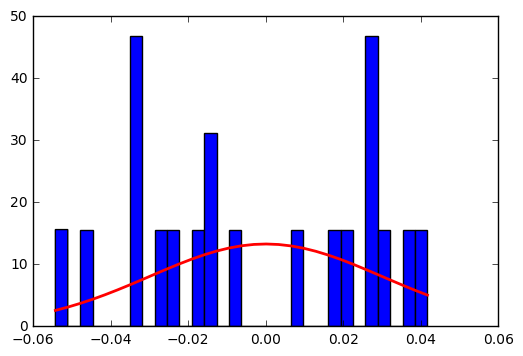

In [34]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
linewidth=2, color='r')
plt.show()  #Plot of variable S

In [35]:
Gamma = {}
Alpha = 0.5
Gamma= Alpha*s
Housepricechange = (0.01 + Gamma)
print Housepricechange

[-0.00644516  0.01968408  0.02344536  0.00116746  0.02786183 -0.00209814
 -0.00336915 -0.01261541  0.02396135  0.00302028  0.02363195  0.01823594
  0.00356159 -0.00665849 -0.0171531   0.02518221  0.0142302   0.03085244
 -0.00710778  0.00646869]


## Consumer Utility
Consumer utility is estimated via the following formula. C stands for consumption on non-durable goods. H stand for consumption on housing. 

$$
R_i(q_j) = \frac{C^{1-Y}}{1-Y} + \theta \frac{H^{1-Y}}{1-Y}
$$

Values for housing and non-durable consumption were extracted from th central bureau of statistics in the Netherlands. The values that we have extracted are shown in the table below


In [36]:
df2 = pd.read_csv('C:\Users\ymmja\Documents\Universiteit\Master\Phyton\HousingandConsumptionNL.csv', sep=';', na_values=".")
df2

,Period,H,C
0,1995,15.7,79.1
1,1996,15.8,79.1
2,1997,15.7,78.3
3,1998,15.4,77.9
4,1999,15.2,78.2
5,2000,14.9,78.6
6,2001,15.5,78.9
7,2002,15.5,80.0
8,2003,16.0,80.6
9,2004,16.4,81.3


In [37]:
C = df2[['C']]
H = df2[['H']]
Y = 3
Theta = 1

U_C = (C**(1-Y)/(1-Y)) #Utility from consumption of non-durable goods
U_H = Theta*(H**(1-Y)/(1-Y)) #Utility from consumptio of housing

UC=U_C.values.T.tolist()
UH=U_H.values.T.tolist()
Utility= UC + UH
Utility = [sum(x) for x in zip(*Utility)]
print Utility

[-0.0021083927840698955, -0.002082797080055457, -0.0021100340850477442, -0.0021906752345481487, -0.002245890363625568, -0.0023330836685880184, -0.002161484028251739, -0.002159290452653486, -0.0020300911779827474, -0.0019346590054866442, -0.0019125673664742524, -0.002004958002159023, -0.0020284006972411455, -0.00200222205226339, -0.0017632097620448794, -0.0017431999429665837, -0.0017031785039832194, -0.0016120895080096295, -0.0015141334180313402, -0.0013973948828215055]


## Simulated model - regression
Now that we have simulated values for consumption and houseprice changes we can do a similar regresion as above

In [38]:
X= Housepricechange
y= Utility

mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model

print res.summary()   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     5.760
Date:                Mon, 23 Jan 2017   Prob (F-statistic):             0.0268
Time:                        16:28:34   Log-Likelihood:                 98.890
No. Observations:                  20   AIC:                            -195.8
Df Residuals:                      19   BIC:                            -194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0565      0.024     -2.400      0.0

## Conclusion
As expected, housing prices influence the variations in consumer confidence. In the case of the model for the entire country, housing prices, income, GDP, and poverty risk turn out to be statistically significant with a significance level below 10%. With regards to the regional regressions, only in the case of the North Netherlands the housing prices were statistically significant at a 10% level. This results are in line with what we expected, given the literature described above. Moreover, for the rest of the regional regressions none of the explanatory variables were statistically significant at a 10% level or below. The latter may be linked to the little availability of data or little variation in the observations. 

Regarding the simulation model, the results differ from those observed in Campbell and Cocco (2006). The estimated change in housing prices, although it had a positive effect on the utility of consumption, was not statistically significant at a 10% level. This outcome may be linked to the difference in the number of observations that the authors from the original paper had. 

The effect of housing on consumer confidence, and thus, consumption has been widely studied, however we were not able to find a study that focused on this relationship for the Dutch case, let alone at a regional level. The availability of a more complete data set would prove extremely useful for future research and might improve the understanding that we have of the Dutch housing market.

## Robustnuss check
An important parameter in this analysis is aplha. We have worked with α=0.7. However, any α>0 should work. This means that states with low house prices are also states with low permanent labor income. When we change alpha, our simulatulated houseprice changes data will also change. This will lead to a new regression. To do a rebostnuss check, we will now run the same simulated model with an α of 0.2. We find that when alpha gets closer to 0 the effect becomes more significant. 


In [28]:
Gamma = {}
Alpha = 0.2
Gamma= Alpha*s
Housepricechange_new = (0.01 + Gamma)
print Housepricechange_new

[  6.98086293e-05   8.72018626e-03   1.43922670e-02   1.08993647e-02
   9.13703851e-03   1.52087177e-02   1.16343224e-02   2.68395623e-03
   5.61516156e-03   8.07936277e-03   1.36527954e-02   6.53907796e-03
   2.94399808e-03   5.08528242e-03   1.11355187e-02   8.23142408e-03
   1.42231778e-02   1.64233221e-02   2.84378338e-03   2.15661411e-02]


In [29]:
X= Housepricechange_new
y= Utility

mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model

print res.summary()   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     47.53
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           1.42e-06
Time:                        16:27:09   Log-Likelihood:                 108.77
No. Observations:                  20   AIC:                            -215.5
Df Residuals:                      19   BIC:                            -214.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1532      0.022     -6.894      0.0